In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [82]:
df_score = pd.read_csv("score.txt", sep=" ", header=0)



In [83]:
df_score

,i,name,total_amount,reward,type
0,0,Randy,182871.362425,0,Allgame
1,0,Stealer,243510.924617,0,Allgame
2,0,Karmine,131876.483594,0,Allgame
3,0,Splitter,118885.833388,0,Allgame
4,0,Pretender,197798.790822,0,Allgame
...,...,...,...,...,...
3495,499,Randy,181462.529030,0,Allgame
3496,499,Karmine,129829.398426,0,Allgame
3497,499,GP_agent_1,176592.930357,1875,Allgame
3498,499,Opportunist,136269.247897,0,Allgame


In [84]:
df_GP_1=df_score.where(df_score["name"] == "GP_agent_1").dropna().reset_index(drop=True)

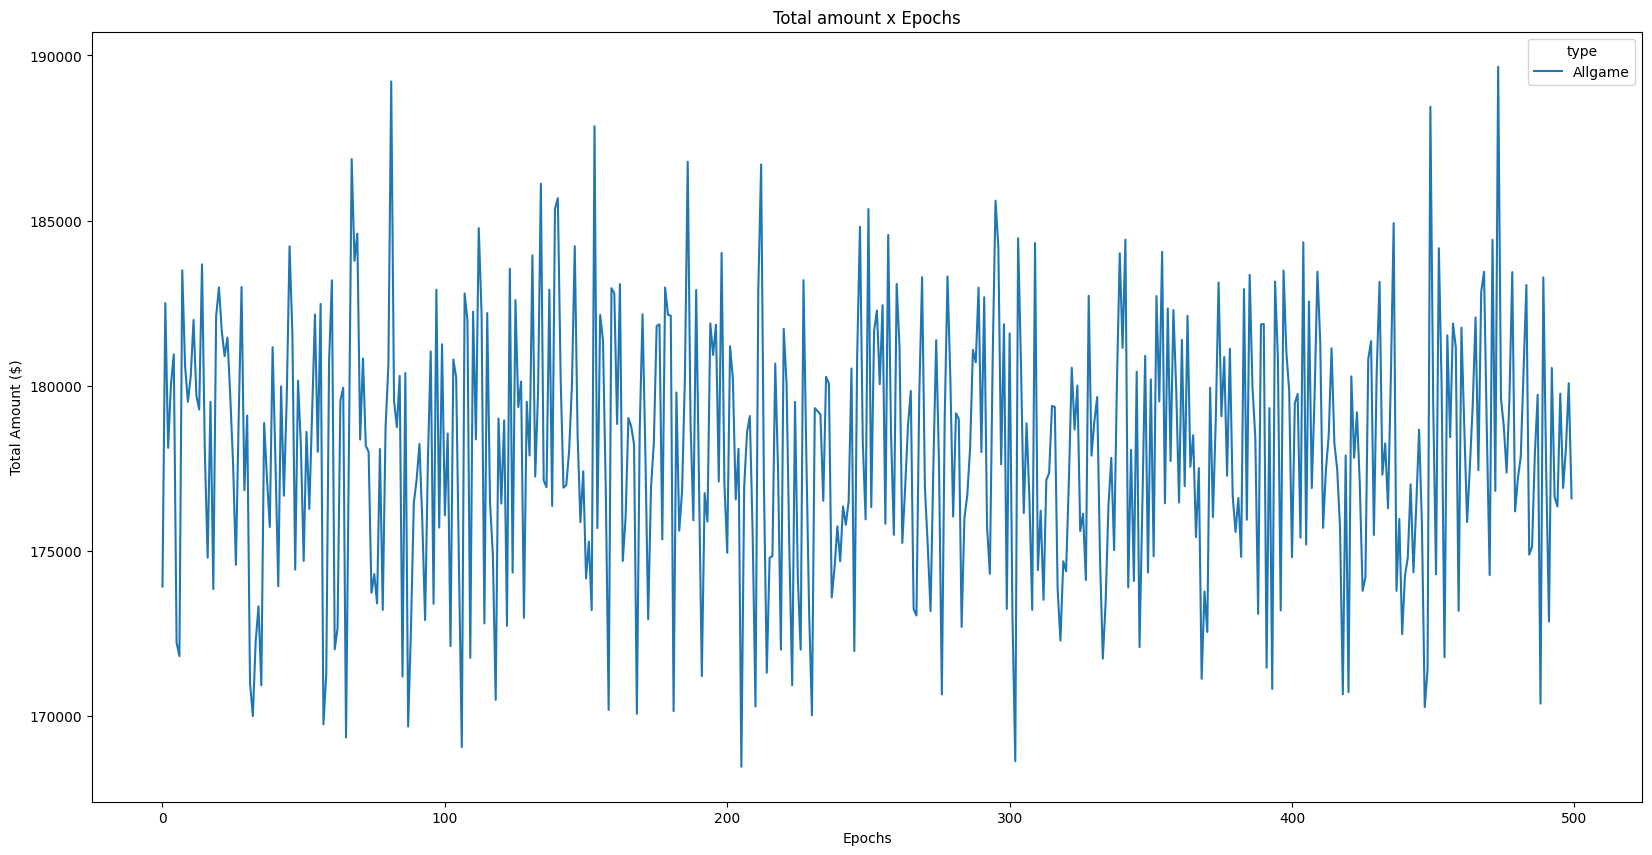

In [85]:
# pivot the data into the correct shape
plt.figure(figsize=(20,10))
sn.lineplot(data = df_GP_1, x = "i", y = 'total_amount', hue = 'type', errorbar=None)
plt.title("Total amount x Epochs")
plt.ylabel("Total Amount ($)")
plt.xlabel("Epochs")
plt.show()


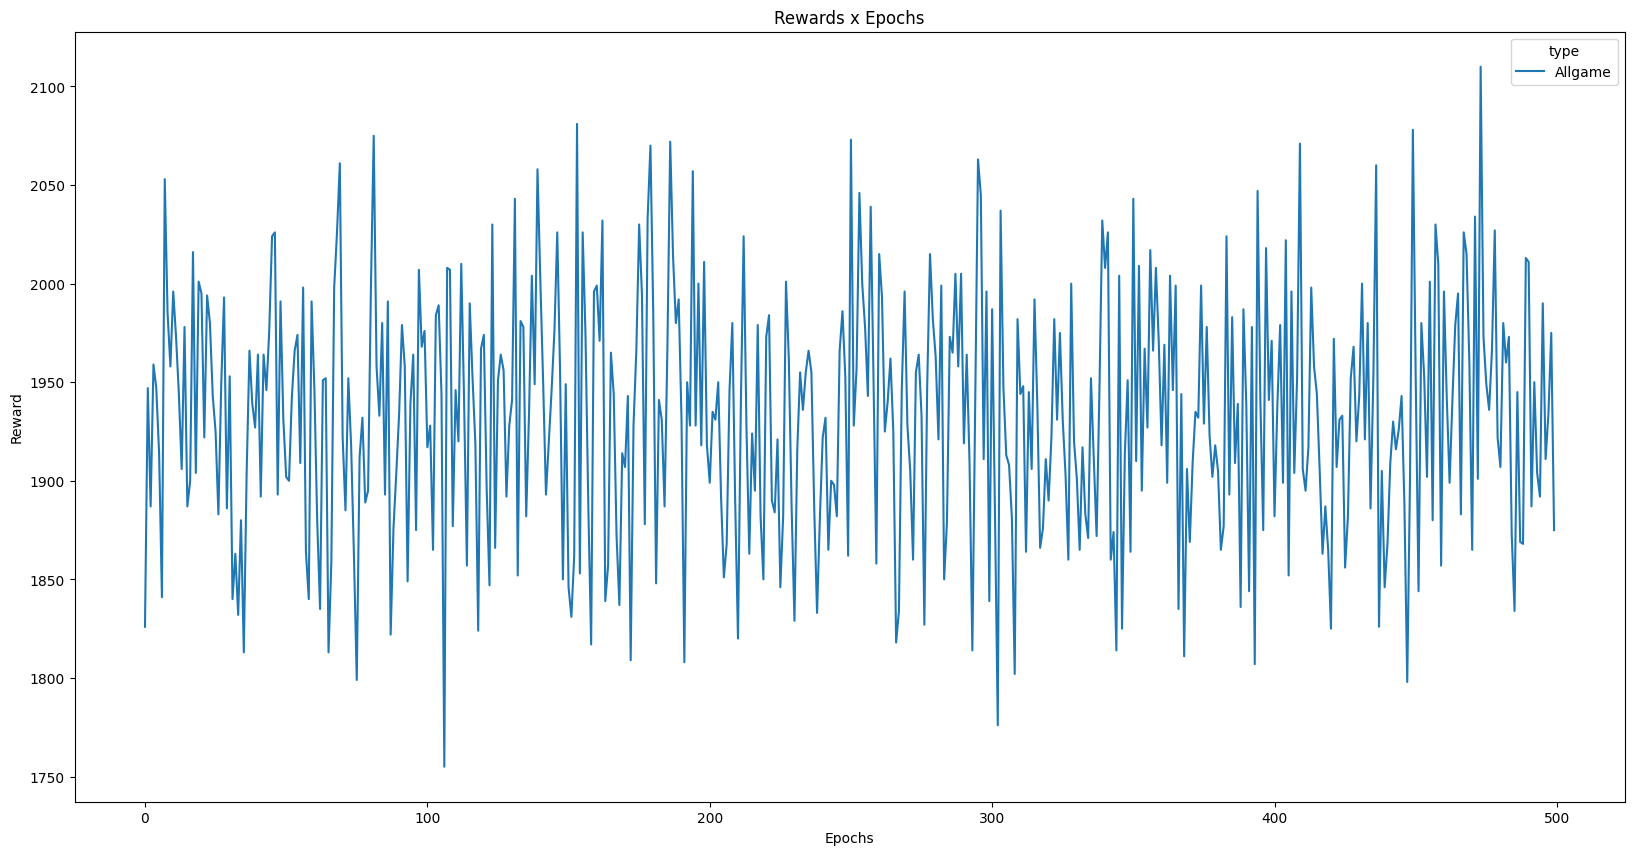

In [86]:
plt.figure(figsize=(20,10))
sn.lineplot(data = df_GP_1, x = "i", y = 'reward', hue = 'type',errorbar=None)
plt.title("Rewards x Epochs")
plt.ylabel("Reward")
plt.xlabel("Epochs")
plt.show()

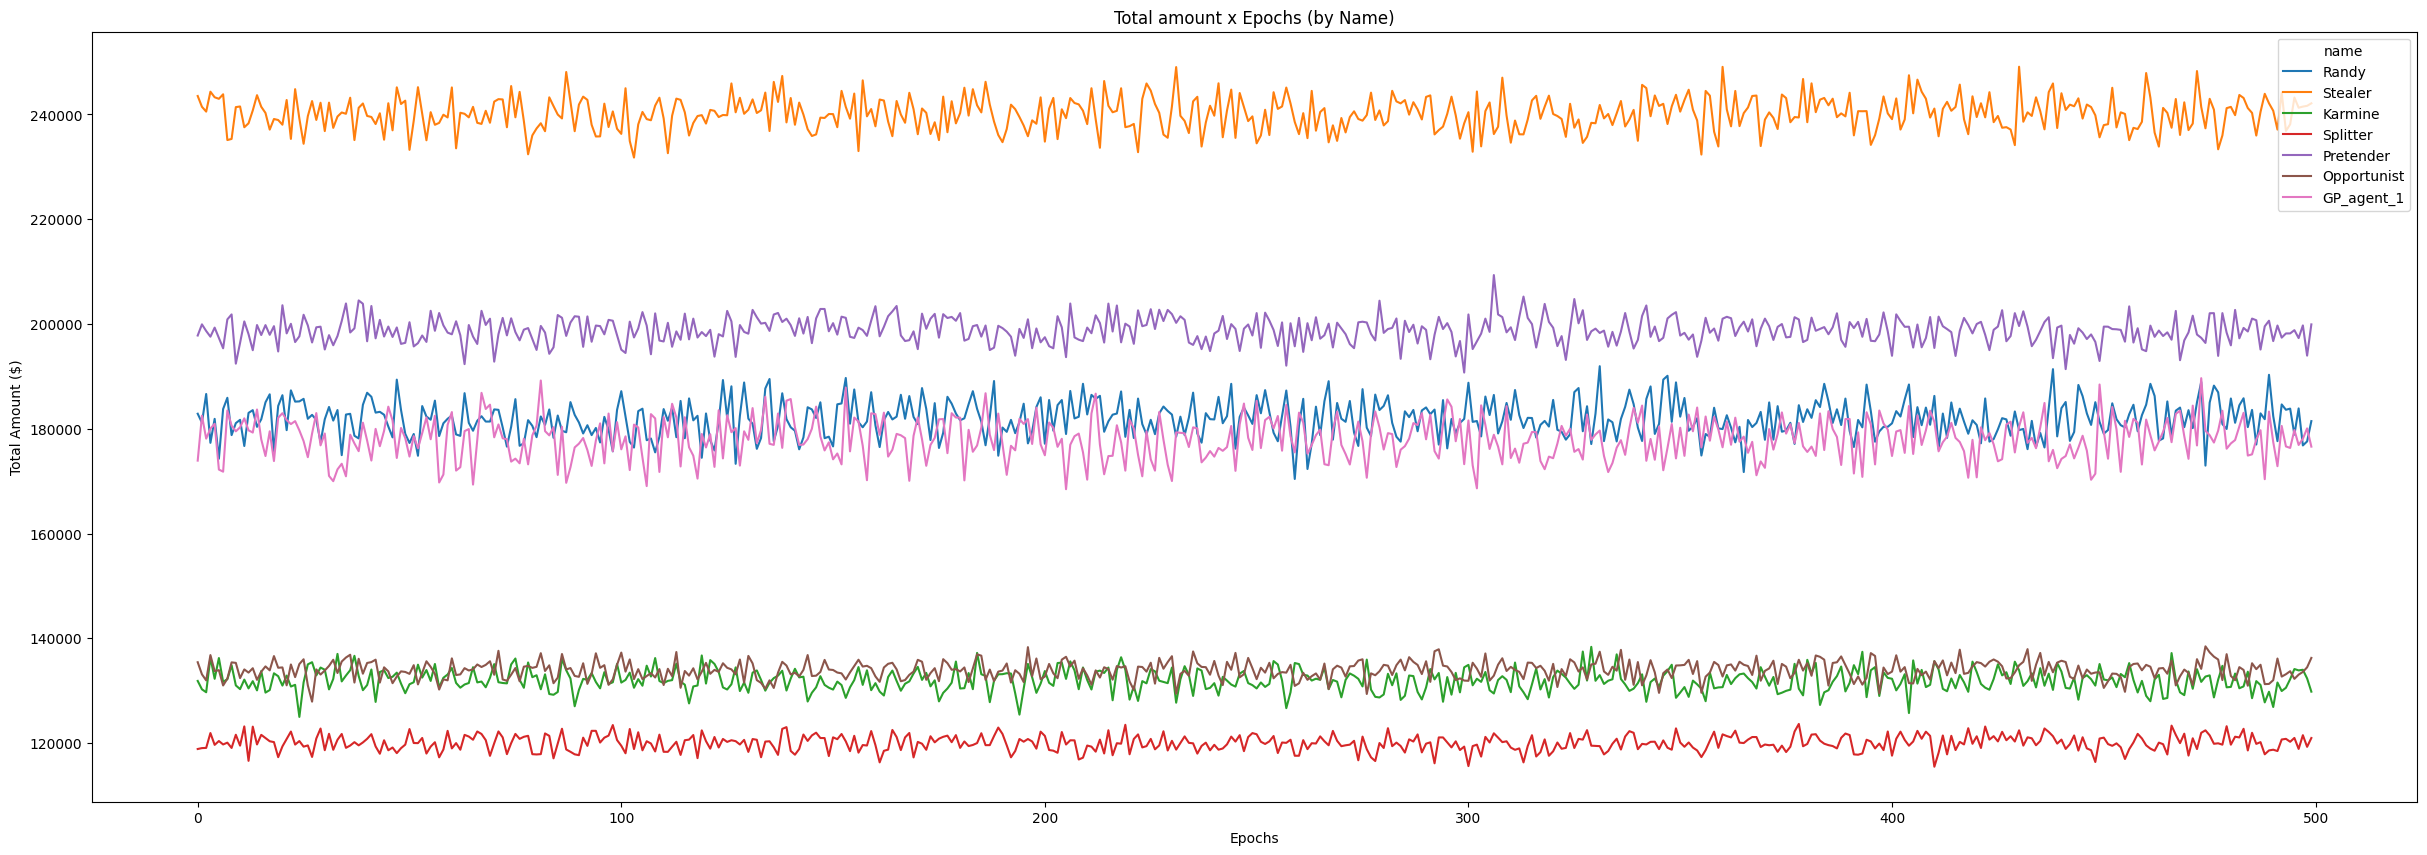

In [87]:
plt.figure(figsize=(30,10))
sn.lineplot(data = df_score, x = "i", y = 'total_amount', hue = 'name', errorbar=None)
plt.title("Total amount x Epochs (by Name)")
plt.ylabel("Total Amount ($)")
plt.xlabel("Epochs")
plt.show()

In [88]:
df_Allgame=df_score.where(df_score["type"] == "Allgame").dropna().reset_index(drop=True)
df_Simple=df_score.where(df_score["type"] == "Simple").dropna().reset_index(drop=True)
df_Difficult=df_score.where(df_score["type"] == "Difficult").dropna().reset_index(drop=True)
df_Very_difficult=df_score.where(df_score["type"] == "Very_difficult").dropna().reset_index(drop=True)
df_Karma_aware=df_score.where(df_score["type"] == "Karma_aware").dropna().reset_index(drop=True)
df_Opportunists=df_score.where(df_score["type"] == "Opportunists").dropna().reset_index(drop=True)
df_3_Karmines=df_score.where(df_score["type"] == "3_Karmines").dropna().reset_index(drop=True)


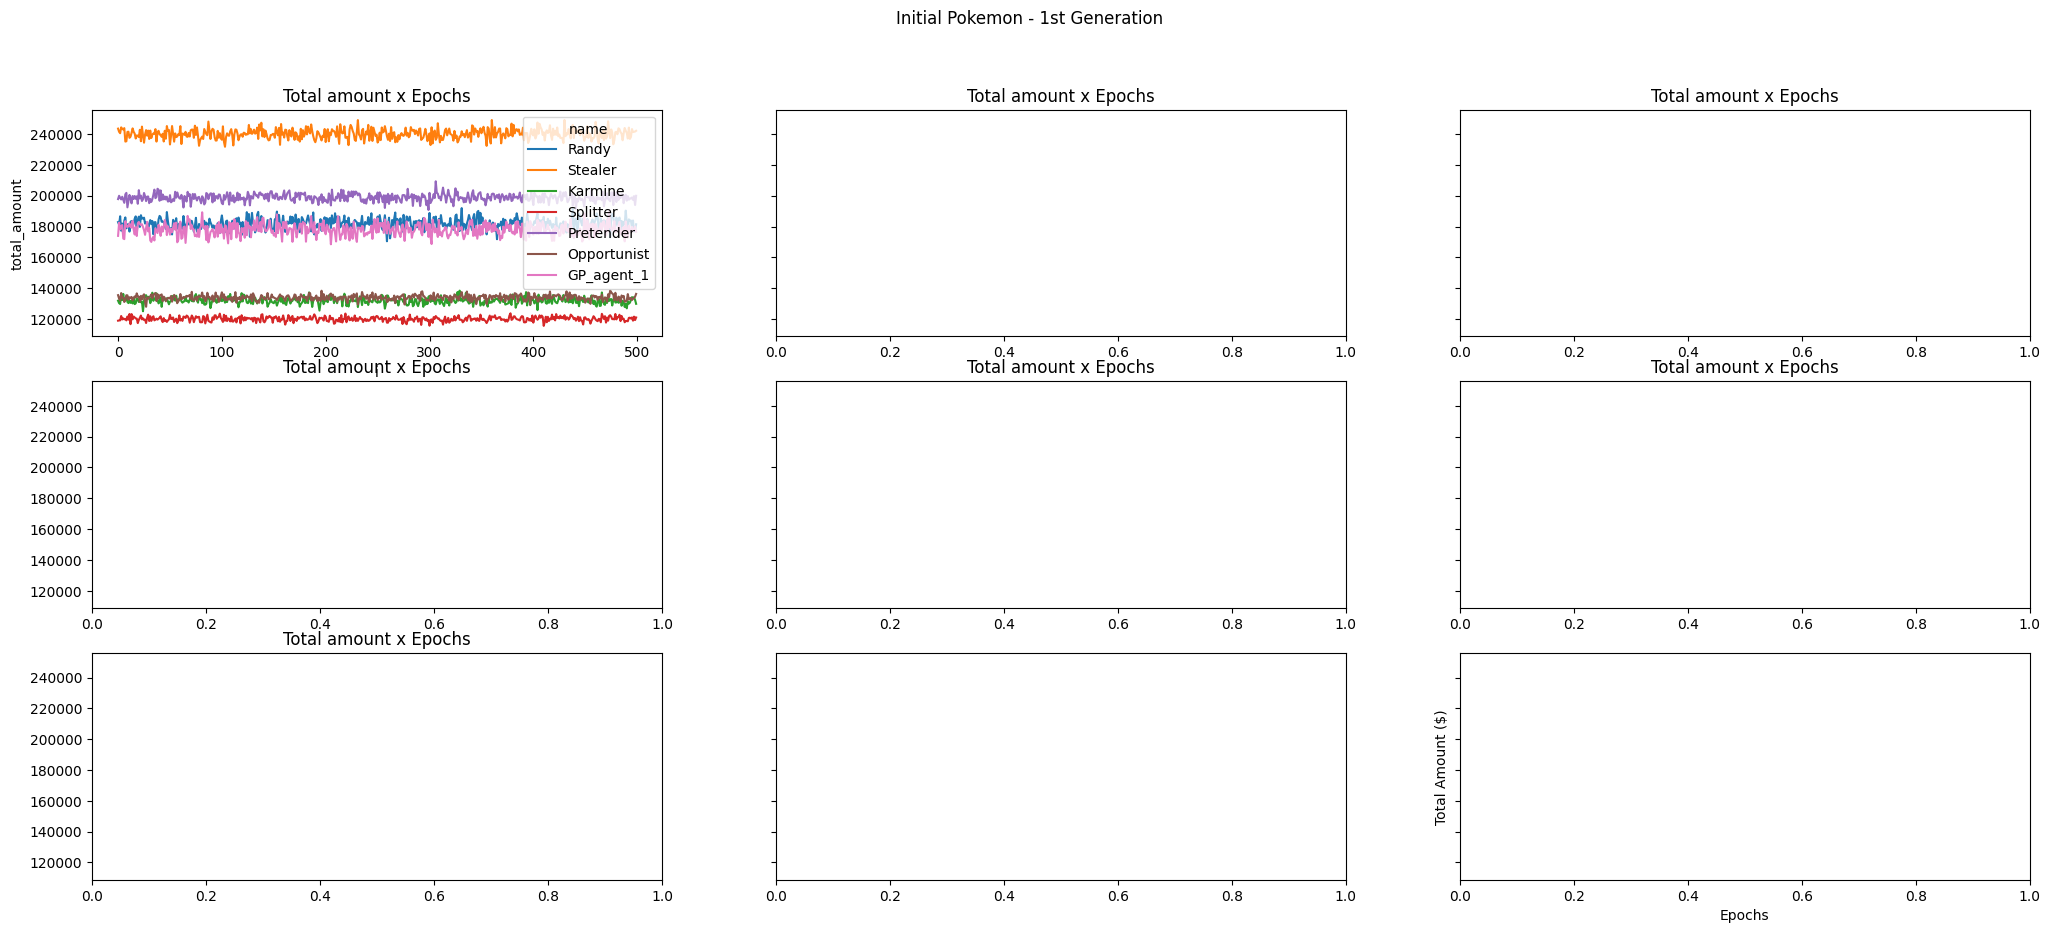

In [89]:
fig, axes = plt.subplots(3, 3, figsize=(25, 10), sharey=True)
fig.suptitle('Initial Pokemon - 1st Generation')

sn.lineplot(ax=axes[0, 0],data = df_Allgame, x = "i", y = 'total_amount', hue = 'name')

sn.lineplot(ax=axes[0, 1],data = df_Simple, x = "i", y = 'total_amount', hue = 'name')

sn.lineplot(ax=axes[0, 2],data = df_Difficult, x = "i", y = 'total_amount', hue = 'name')

sn.lineplot(ax=axes[1, 0],data = df_Very_difficult, x = "i", y = 'total_amount', hue = 'name')

sn.lineplot(ax=axes[1, 1],data = df_Karma_aware, x = "i", y = 'total_amount', hue = 'name')

sn.lineplot(ax=axes[1, 2],data = df_Opportunists, x = "i", y = 'total_amount', hue = 'name')

sn.lineplot(ax=axes[2, 0],data = df_3_Karmines, x = "i", y = 'total_amount', hue = 'name')
axes[0][0].set_title("Total amount x Epochs")
axes[0][1].set_title("Total amount x Epochs")
axes[0][2].set_title("Total amount x Epochs")
axes[1][0].set_title("Total amount x Epochs")
axes[1][1].set_title("Total amount x Epochs")
axes[1][2].set_title("Total amount x Epochs")
axes[2][0].set_title("Total amount x Epochs")
plt.ylabel("Total Amount ($)")
plt.xlabel("Epochs")
plt.show()

In [90]:
def read_policy_reward(file_name):
    last_line = 0
    with open(file_name, "r") as file:
        last_line = file.readlines()[-1]
    return int(last_line)

In [91]:
reward_3_karmines = read_policy_reward('trained_3_Karmines_gp_police_1.txt')
reward_allgame = read_policy_reward('trained_Allgame_gp_police_1.txt')
reward_difficult = read_policy_reward('trained_Difficult_gp_police_1.txt')
reward_karma_aware = read_policy_reward('trained_Karma_aware_gp_police_1.txt')
reward_opportunists = read_policy_reward('trained_Opportunists_gp_police_1.txt')
reward_simple = read_policy_reward('trained_Simple_gp_police_1.txt')
reward_very_difficult = read_policy_reward('trained_Very_difficult_gp_police_1.txt')

In [92]:
d = {'game_type': ['3_Karmines', 'Allgame', 'Difficult', 'Karma_aware', 'Opportunists', 'Simple', 'Very_difficult'], 'reward': [reward_3_karmines, reward_allgame, reward_difficult, reward_karma_aware, reward_opportunists, reward_simple, reward_very_difficult]}
rewards_df = pd.DataFrame(data=d)

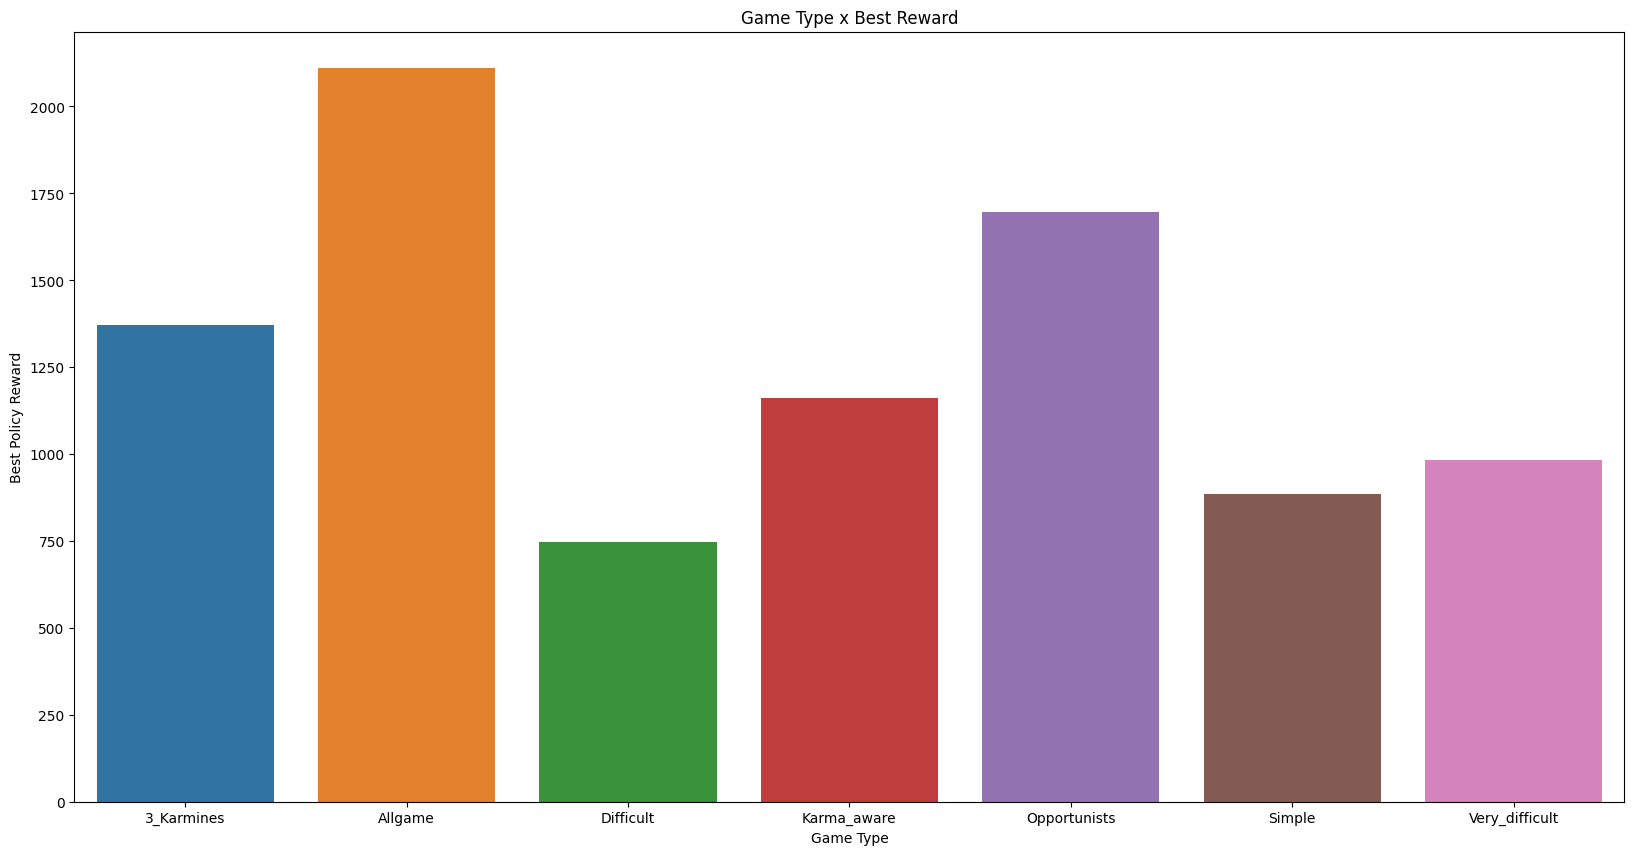

In [93]:
# pivot the data into the correct shape
plt.figure(figsize=(20,10))
sn.barplot(data = rewards_df, x = "game_type", y = 'reward', errorbar=None)
plt.title("Game Type x Best Reward")
plt.ylabel("Best Policy Reward")
plt.xlabel("Game Type")
plt.show()
